#RUN EVERYTHING !

In [1]:
# import libraries

%load_ext autoreload
%autoreload 2

!pip install warfit-learn

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import sklearn

import warfit_learn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 9.9 MB/s eta 0:00:00


In [2]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Warfarin Data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6256 entries, 0 to 6255
Data columns (total 68 columns):
 #   Column                                                                  Non-Null Count  Dtype  
---  ------                                                                  --------------  -----  
 0   PharmGKB Subject ID                                                     6256 non-null   object 
 1   PharmGKB Sample ID                                                      6256 non-null   object 
 2   Project Site                                                            6256 non-null   int64  
 3   Gender                                                                  6252 non-null   object 
 4   Race (Reported)                                                         5750 non-null   object 
 5   Race (OMB)                                                              6256 non-null   object 
 6   Ethnicity (Reported)                                                    5017 non

In [3]:
from warfit_learn import preprocessing

data_inspect = preprocessing.clean_iwpc(data)
df = preprocessing.prepare_iwpc(data, drop_inr=False)
df.shape, data_inspect.shape

((5741, 33), (5741, 70))

In [4]:
data.drop(['INR on Reported Therapeutic Dose of Warfarin'], axis='columns', inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5741 entries, 0 to 6255
Data columns (total 33 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Height (cm)                                   5741 non-null   float64
 1   Weight (kg)                                   5741 non-null   float64
 2   Amiodarone (Cordarone)                        5741 non-null   float64
 3   Carbamazepine (Tegretol)                      5741 non-null   float64
 4   Phenytoin (Dilantin)                          5741 non-null   float64
 5   Rifampin or Rifampicin                        5741 non-null   float64
 6   Current Smoker                                5741 non-null   float64
 7   Therapeutic Dose of Warfarin                  5741 non-null   float64
 8   INR on Reported Therapeutic Dose of Warfarin  5741 non-null   float64
 9   Race (OMB)_Asian                              5741 non-null   u

In [6]:
df.describe()

,Height (cm),Weight (kg),Amiodarone (Cordarone),Carbamazepine (Tegretol),Phenytoin (Dilantin),Rifampin or Rifampicin,Current Smoker,Therapeutic Dose of Warfarin,INR on Reported Therapeutic Dose of Warfarin,Race (OMB)_Asian,...,CYP2C9 consensus_*1/*2,CYP2C9 consensus_*1/*3,CYP2C9 consensus_*2/*2,CYP2C9 consensus_*2/*3,CYP2C9 consensus_*3/*3,CYP2C9 consensus_Unknown,Imputed VKORC1_A/A,Imputed VKORC1_A/G,Imputed VKORC1_G/G,Imputed VKORC1_Unknown
count,5741.000000,5741.000000,5741.000000,5741.000000,5741.000000,5741.000000,5741.000000,5741.000000,5741.000000,5741.000000,...,5741.000000,5741.000000,5741.000000,5741.000000,5741.000000,5741.000000,5741.000000,5741.000000,5741.000000,5741.000000
mean,167.979150,78.794878,0.048772,0.005574,0.004529,0.000697,0.083957,31.967232,2.152263,0.263891,...,0.131510,0.083957,0.010103,0.011845,0.003484,0.022296,0.295245,0.358474,0.328166,0.018115
std,10.581973,22.316584,0.215410,0.074457,0.067150,0.026389,0.277348,16.765840,0.815865,0.440779,...,0.337987,0.277348,0.100012,0.108196,0.058925,0.147657,0.456192,0.479594,0.469586,0.133380
min,124.970000,30.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.100000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,160.020000,63.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.020000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,167.640000,76.000000,0.000000,0.000000,0.000000,0.000000,0.000000,28.000000,2.340000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,175.790577,90.700000,0.000000,0.000000,0.000000,0.000000,0.000000,40.000000,2.600000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,202.000000,237.700000,1.000000,1.000000,1.000000,1.000000,1.000000,230.000000,6.100000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


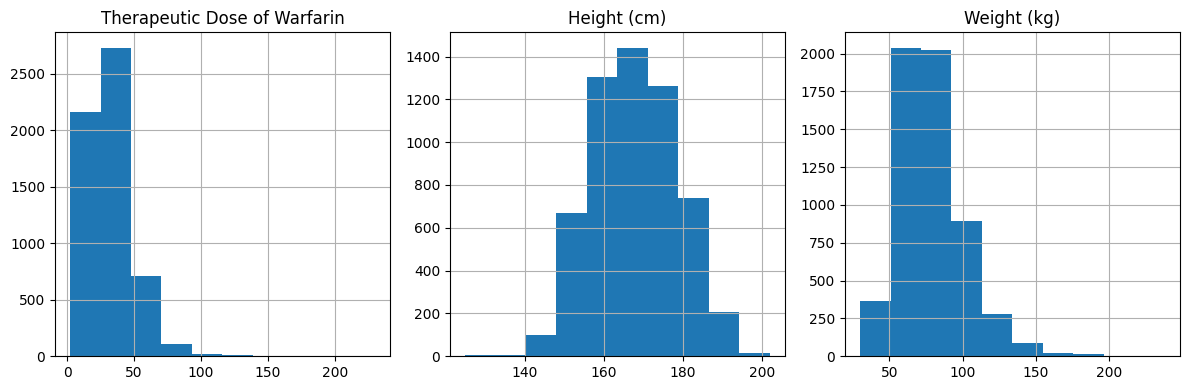

In [7]:
fig, axes = plt.subplots(1, 3, figsize=(12, 4)) 
df[[
    'Therapeutic Dose of Warfarin',
    'Height (cm)',
    'Weight (kg)',
]].hist(ax=axes)  

plt.tight_layout()
plt.show()


<Axes: >

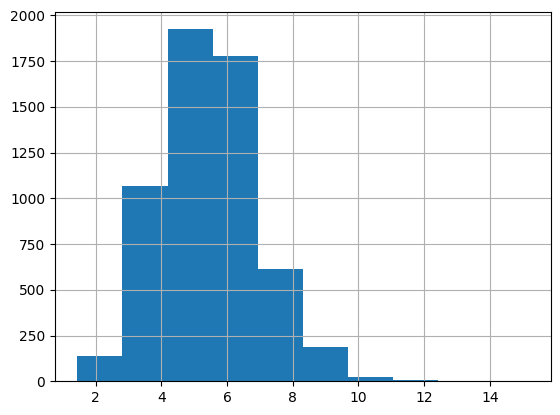

In [8]:
#take the square root of this feature to produce a normal distribution

df['Therapeutic Dose of Warfarin'] = df['Therapeutic Dose of Warfarin'].apply(np.sqrt)
df['Therapeutic Dose of Warfarin'].hist()

In [9]:
import warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [10]:
#more imports
from warfit_learn.evaluation import evaluate_estimators
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import LinearSVR
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from mlxtend.regressor import StackingCVRegressor

In [11]:
!pip install tpot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.4/87.4 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.9/139.9 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=11938 sha256=3ffa67f0a33d708595e23097e790094cb3dc74e3c95ad692dce0f59a29395b81
  Stored in directory: /root/.cache/pip/wheels/af/f9/87/bf5b3d565c2a007b4dae9d8142dccc85a9f164e517062dd519
Successfully built stopit


In [12]:
from sklearn.feature_selection import SelectFwe, f_regression, SelectPercentile
from sklearn.preprocessing import StandardScaler, RobustScaler, MaxAbsScaler, MinMaxScaler, FunctionTransformer, Normalizer
from sklearn.linear_model import RidgeCV, ElasticNetCV, LassoLarsCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.ensemble import GradientBoostingRegressor, ExtraTreesRegressor
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline, make_union
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_approximation import RBFSampler, Nystroem
from tpot.builtins import StackingEstimator, ZeroCount
from copy import copy

In [13]:
ests = []

LR = LinearRegression()
LSVR = LinearSVR()
GBT = GradientBoostingRegressor()
GBT_ = GradientBoostingRegressor(learning_rate=0.1, loss='absolute_error', max_depth=4)
SV = SVR(kernel='linear', cache_size=1000)
NN = MLPRegressor(hidden_layer_sizes=(100, ), activation='logistic', solver='lbfgs')
RR = Ridge(alpha=1.0)
Stack1 = StackingCVRegressor(regressors=[GBT_, SV, NN], meta_regressor=SV, cv=5,)
Stack2 = StackingCVRegressor(regressors=[GBT_, RR, NN], meta_regressor=RR, cv=5,)

ests.append(LR)
ests.append(LSVR)
ests.append(GBT)
ests.append(RR)
ests.append(GBT_)
ests.append(SV)
ests.append(NN)
ests.append(Stack1)
ests.append(Stack2)

LR.identifier = 'LR'
LSVR.identifier = 'LSVR'
GBT.identifier = 'GBT'
GBT_.identifier = "GBT_"
SV.identifier = 'SV'
NN.identifier = 'NN'
RR.identifier = 'RR'
Stack1.identifier = 'Stack_1'
Stack2.identifier = 'Stack_2'


In [14]:
tpot2 = make_pipeline(
    StackingEstimator(estimator=LinearSVR(C=1.0, dual=True, epsilon=0.01,loss="epsilon_insensitive", tol=0.001,)),
    StackingEstimator(estimator=ElasticNetCV(l1_ratio=0.6000000000000001, tol=0.01, cv=5)),
    RobustScaler(),
    StackingEstimator(estimator=RidgeCV()),
    ExtraTreesRegressor(bootstrap=True, max_features=1.0, min_samples_leaf=20, min_samples_split=2, n_estimators=100,)
)

ests.append(tpot2)
tpot2.identifier = 'TPOT2'

In [15]:
evaluation_results = evaluate_estimators(
    ests,
    df,
    target_column='Therapeutic Dose of Warfarin' 
    ,scale=True
    ,resamples = 100 
    ,test_size=0.2
    ,squaring = True 
    ,technique = 'mccv' 
    ,parallelism = 0.8 
)

Using 1 / 2 CPU cores...

LR...
   PW20      MAE        R2
-------  -------  --------
46.3829  8.52846  0.460534

LSVR...
  PW20      MAE        R2
------  -------  --------
46.517  8.51917  0.459182

GBT...
   PW20      MAE        R2
-------  -------  --------
45.7363  8.67637  0.444286

RR...
   PW20      MAE        R2
-------  -------  --------
46.0078  8.58509  0.455822

GBT_...
   PW20      MAE        R2
-------  -------  --------
46.1297  8.64659  0.443108

SV...
   PW20      MAE        R2
-------  -------  --------
46.3795  8.54631  0.457423

NN...
   PW20     MAE        R2
-------  ------  --------
41.9269  9.5905  0.319522

Stack_1...
   PW20      MAE        R2
-------  -------  --------
46.5509  8.51527  0.464958

Stack_2...
   PW20      MAE       R2
-------  -------  -------
46.5344  8.55197  0.45942

TPO2...
   PW20      MAE        R2
-------  -------  --------
45.9156  8.54626  0.463852


                PW20       MAE        R2
Estimator                               
GBT

In [16]:
from warfit_learn.metrics import confidence_interval
from scipy.stats import norm

def format_summary(df_res):
    df_summary = df_res.groupby(['Estimator']).mean()
    df_summary.reset_index(inplace=True)
    for alg in df_res['Estimator'].unique():
        for metric in ['PW20', 'MAE', 'R2']:
            lo, hi = confidence_interval(
                df_res[metric][df_res['Estimator'] == alg].values,
            )
            mean = df_res[metric][df_res['Estimator'] == alg].mean()
            
            for v in [mean, lo, hi]:
                if not -10000 < v < 10000:
                    mean, lo, hi = np.nan, np.nan, np.nan
                    
            conf = f"{mean:.2f} ({lo:.2f}–{hi:.2f})"
            df_summary[metric][df_summary['Estimator'] == alg] = conf
            
    return df_summary


In [18]:
results_formatted = format_summary(evaluation_results).drop('R2', axis=1)
df_final = pd.concat([results_formatted,], axis=1, keys=['Evaluation Results'])
df_final

<ipython-input-16-d61bdd48cbe1>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_summary[metric][df_summary['Estimator'] == alg] = conf


Evaluation Results                                        
           Estimator                 PW20                MAE
0                GBT  45.74 (42.99–48.61)   8.68 (8.24–9.25)
1               GBT_  46.13 (44.08–49.57)   8.65 (8.15–9.07)
2                 LR  46.38 (43.16–49.22)   8.53 (8.14–8.98)
3               LSVR  46.52 (43.60–48.61)   8.52 (8.01–8.98)
4                 NN  41.93 (39.55–43.91)  9.59 (9.11–10.10)
5                 RR  46.01 (43.55–48.39)   8.59 (8.08–9.04)
6                 SV  46.38 (44.47–49.09)   8.55 (8.17–8.98)
7            Stack_1  46.55 (44.29–49.35)   8.52 (8.10–8.92)
8            Stack_2  46.53 (44.16–49.44)   8.55 (8.04–9.06)
9               TPO2  45.92 (43.12–49.26)   8.55 (8.00–9.02)